In [ ]:
# Inserting Necessary Librariies

import tensorflow as tf
import pandas as pd
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

In [ ]:
# Loading the Ciphar Dataset

from tensorflow.keras.datasets.cifar10 import load_data    # To load the MNIST digit dataset

(X_train, y_train) , (X_test, y_test) = load_data()      # Loading data

170500096/170498071 [==============================] - 2s 0us/step


In [ ]:
print("There are ", len(X_train), "images in the training dataset")     # checking total number of records / data points available in the X_train dataset
print("There are ", len(X_test), "images in the test dataset")     # checking total number of records / data points available in the X_test dataset

There are  50000 images in the training dataset
There are  10000 images in the test dataset


In [ ]:
# Checking the shape of one image
X_train[0].shape

(32, 32, 3)

In [ ]:
# Take a look how one image looks like
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

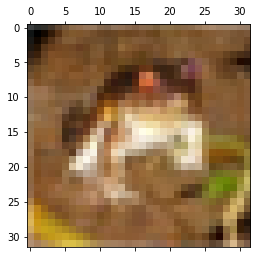

In [ ]:
import matplotlib.pyplot as plt

plt.matshow(X_train[0])


In [ ]:
y_train[0]

array([6], dtype=uint8)

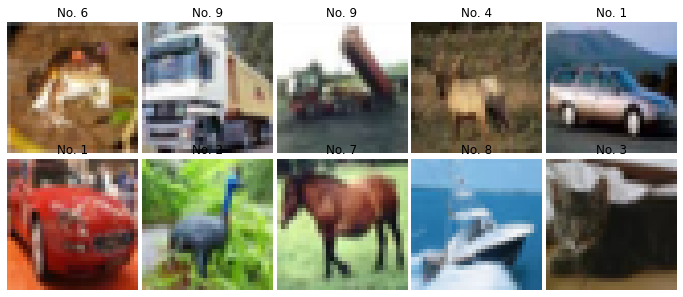

In [ ]:
# code to view the images
num_rows, num_cols = 2, 5
f, ax = plt.subplots(num_rows, num_cols, figsize=(12,5),
                     gridspec_kw={'wspace':0.03, 'hspace':0.01}, 
                     squeeze=True)

for r in range(num_rows):
    for c in range(num_cols):
      
        image_index = r * 5 + c
        ax[r,c].axis("off")
        ax[r,c].imshow( X_train[image_index], cmap='gray')
        ax[r,c].set_title('No. %d' % y_train[image_index])
plt.show()
plt.close()

In [ ]:
X_train = X_train / 255
X_test = X_test / 255

"""
Why divided by 255?
The pixel value lie in the range 0 - 255 representing the RGB (Red Green Blue) value. """

'\nWhy divided by 255?\nThe pixel value lie in the range 0 - 255 representing the RGB (Red Green Blue) value. '

In [ ]:
X_train[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [ ]:
# Checking the shape of the image
X_train.shape

(50000, 32, 32, 3)

In [ ]:
X_train_flattened = X_train.reshape(len(X_train), 32*32*3)    # converting our 2D array representin an image to one dimensional
X_test_flattened = X_test.reshape(len(X_test), 32*32*3)


In [ ]:
X_train_flattened.shape

(50000, 3072)

In [ ]:
INPUT_SHAPE = (32,32,3)

In [ ]:

# Defining the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, input_shape=(3072,), activation='relu'),
    tf.keras.layers.Dense(100, input_shape=(3072,),activation='relu'),
    tf.keras.layers.Dense(10, activation='sigmoid')
])


In [ ]:
# Printing Model Summary

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               307300    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 318,410
Trainable params: 318,410
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compiling the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])



In [ ]:
# Fit the model

#model.fit(X_train_flattened, y_train, batch_size= 128,epochs=5)
model.fit(x= X_train_flattened,y=y_train,validation_split=0.3,epochs=20)

Epoch 1/20
1094/1094 [==============================] - 4s 3ms/step - loss: 1.9256 - accuracy: 0.2931 - val_loss: 1.7856 - val_accuracy: 0.3528
Epoch 2/20
1094/1094 [==============================] - 4s 3ms/step - loss: 1.7488 - accuracy: 0.3687 - val_loss: 1.7387 - val_accuracy: 0.3725
Epoch 3/20
1094/1094 [==============================] - 3s 3ms/step - loss: 1.6732 - accuracy: 0.3970 - val_loss: 1.6985 - val_accuracy: 0.3910
Epoch 4/20
1094/1094 [==============================] - 4s 3ms/step - loss: 1.6285 - accuracy: 0.4158 - val_loss: 1.6647 - val_accuracy: 0.4034
Epoch 5/20
1094/1094 [==============================] - 3s 3ms/step - loss: 1.5826 - accuracy: 0.4315 - val_loss: 1.6097 - val_accuracy: 0.4263
Epoch 6/20
1094/1094 [==============================] - 4s 3ms/step - loss: 1.5549 - accuracy: 0.4406 - val_loss: 1.5813 - val_accuracy: 0.4382
Epoch 7/20
1094/1094 [==============================] - 3s 3ms/step - loss: 1.5315 - accuracy: 0.4528 - val_loss: 1.5997 - val_accuracy:

In [ ]:
# Accuracy of the model is not upto the mark

## Convolutional Neural Networks - Building CNN Classifiers

# Reshaping Image Data for Modeling¶
# We do need to reshape our data before we train our model. Here we will work on grayscale, 1-channel images (image pixel tensors)

In [ ]:
cifar10 = tf.keras.datasets.cifar10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

class_names = ['Ship', 'Aeroplane', 'Automobile', 'Bird', 'Cat',
               'Deer', 'Dog', 'Frog', 'Horse', 'Truck']
print('\nTrain_images.shape: {}, of {}'.format(train_images.shape, train_images.dtype))
print('Test_images.shape: {}, of {}'.format(test_images.shape, test_images.dtype))


Train_images.shape: (50000, 32, 32, 3), of uint8
Test_images.shape: (10000, 32, 32, 3), of uint8


In [ ]:
# reshape for feeding into the model
train_images_gr = train_images.reshape(train_images.shape[0], 32, 32, 3)
test_images_gr = test_images.reshape(test_images.shape[0], 32, 32, 3)

print('\nTrain_images.shape: {}, of {}'.format(train_images_gr.shape, train_images_gr.dtype))
print('Test_images.shape: {}, of {}'.format(test_images_gr.shape, test_images_gr.dtype))


Train_images.shape: (50000, 32, 32, 3), of uint8
Test_images.shape: (10000, 32, 32, 3), of uint8


# Build CNN Model Architecture¶
# We will now build our basic 2-layer CNN model architecture.

In [ ]:
# define input shape
INPUT_SHAPE = (32, 32, 3)


In [ ]:
# define sequential model
model = tf.keras.models.Sequential()
# define conv-pool layers - set 1
model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), strides=(1, 1), 
                                activation='relu', padding='valid', input_shape=INPUT_SHAPE))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
# define conv-pool layers - set 2
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), strides=(1, 1), 
                                activation='relu', padding='valid', input_shape=INPUT_SHAPE))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

# add flatten layer
model.add(tf.keras.layers.Flatten())

# add dense layers with some dropout
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(rate=0.3))
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(rate=0.3))

# add output layer
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# compile model
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

# view model layers
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1152)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               295168    
_________________________________________________________________
dropout (Dropout)            (None, 256)              

# Model Training¶
## *Let’s train our model for 100 epochs and look at the performance. We do apply an early-stopping to stop the model training immediately once we don't see an improvement in validation-loss over the last 2 epochs using the EarlyStopping callback.*

In [ ]:


EPOCHS = 100
train_images_scaled = train_images_gr / 255.
es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, 
                                               restore_best_weights=True,
                                               verbose=1)

history = model.fit(train_images_scaled, train_labels,
                    batch_size=32,
                    callbacks=[es_callback], 
                    validation_split=0.2, epochs=EPOCHS,
                    verbose=1)

Epoch 1/100
1250/1250 [==============================] - 4s 3ms/step - loss: 1.5676 - accuracy: 0.4250 - val_loss: 1.2778 - val_accuracy: 0.5412
Epoch 2/100
1250/1250 [==============================] - 4s 3ms/step - loss: 1.2451 - accuracy: 0.5540 - val_loss: 1.1449 - val_accuracy: 0.5977
Epoch 3/100
1250/1250 [==============================] - 4s 3ms/step - loss: 1.1121 - accuracy: 0.6082 - val_loss: 1.0549 - val_accuracy: 0.6303
Epoch 4/100
1250/1250 [==============================] - 4s 3ms/step - loss: 1.0124 - accuracy: 0.6440 - val_loss: 1.0102 - val_accuracy: 0.6430
Epoch 5/100
1250/1250 [==============================] - 4s 3ms/step - loss: 0.9306 - accuracy: 0.6700 - val_loss: 0.9579 - val_accuracy: 0.6611
Epoch 6/100
1250/1250 [==============================] - 4s 3ms/step - loss: 0.8628 - accuracy: 0.6940 - val_loss: 0.9851 - val_accuracy: 0.6590
Epoch 7/100
1250/1250 [==============================] - 4s 3ms/step - loss: 0.8022 - accuracy: 0.7181 - val_loss: 1.0122 - val_ac

# Plot Learning Curves

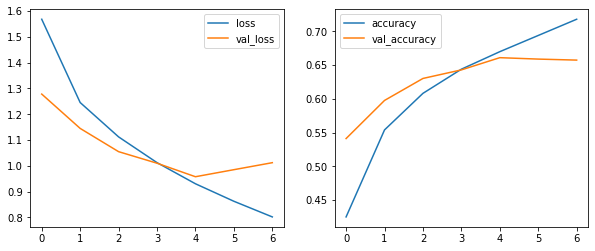

In [ ]:
import pandas as pd

fig, ax = plt.subplots(1, 2, figsize=(10, 4))

history_df = pd.DataFrame(history.history)
history_df[['loss', 'val_loss']].plot(kind='line', ax=ax[0])
history_df[['accuracy', 'val_accuracy']].plot(kind='line', ax=ax[1]);

#Importing new test dataset

In [ ]:
import pandas as pd
evaluation_set=pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/cifar_image_flattened_pixels.csv")
evaluation_set.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,3032,3033,3034,3035,3036,3037,3038,3039,3040,3041,3042,3043,3044,3045,3046,3047,3048,3049,3050,3051,3052,3053,3054,3055,3056,3057,3058,3059,3060,3061,3062,3063,3064,3065,3066,3067,3068,3069,3070,3071
0,98,105,108,92,101,106,91,101,107,93,104,108,89,100,104,88,99,103,90,101,106,95,105,110,99,108,110,109,117,116,119,125,123,125,130,128,134,140,138,140,...,184,178,177,172,190,188,184,220,219,214,195,193,187,176,174,169,175,173,168,192,189,185,185,182,178,168,165,161,178,176,171,183,182,176,175,175,168,181,181,175
1,101,108,101,101,108,101,102,109,102,103,110,103,105,112,104,105,114,109,105,116,112,106,115,110,108,115,108,107,115,107,104,115,106,104,116,108,108,119,115,108,...,149,153,159,164,132,140,142,134,144,145,112,119,118,108,115,111,114,124,122,106,118,116,101,113,108,100,111,102,99,110,103,100,109,104,100,109,103,100,109,102
2,85,115,27,63,90,25,37,66,15,69,93,49,40,52,36,18,24,18,31,38,27,79,91,61,104,117,78,72,84,52,68,79,52,122,131,85,104,113,67,77,...,139,174,188,139,182,198,150,179,194,147,175,186,142,187,195,158,176,191,142,169,190,132,177,193,144,180,189,147,175,190,141,172,193,136,173,192,138,179,192,149
3,213,213,214,215,214,218,220,218,226,223,221,233,226,225,231,225,226,223,223,223,223,227,226,231,229,228,236,229,228,236,230,229,236,228,227,235,227,226,234,225,...,20,111,41,28,111,63,60,120,92,98,138,117,129,153,140,158,172,161,187,188,174,205,195,182,212,199,185,216,197,186,216,193,194,209,201,204,216,203,201,237
4,41,74,144,41,75,139,41,75,139,41,74,144,39,76,140,37,79,130,38,77,135,40,75,142,43,72,145,47,71,146,47,73,140,43,75,140,39,77,143,37,...,149,42,71,135,43,72,125,42,72,122,51,72,117,64,70,109,65,72,99,53,76,113,35,75,136,30,81,140,34,79,133,41,77,130,44,75,133,42,73,144


In [ ]:
# Normalization
evaluation_set = evaluation_set/255.

In [ ]:
# Reshaping the Evaluation Data
import numpy as np
arr = np.array(evaluation_set)
arr = np.array([x.reshape(32,32,3) for x in arr])

In [ ]:
pred=model.predict(arr)

In [ ]:
prediction_labels = np.argmax(pred, axis=1)

In [ ]:
res=pd.DataFrame(prediction_labels)


In [ ]:
res.head()

In [ ]:
# To download the csv file locally
from google.colab import files
res.to_csv("predictions.csv",index=False)
files.download("predictions.csv")

# Lets Use Transfer Learning here

In [ ]:
# Loading the Ciphar Dataset
import tensorflow as tf
from tensorflow.keras.datasets.cifar10 import load_data    # To load the MNIST digit dataset

(X_train, y_train) , (X_test, y_test) = load_data()      # Loading data

In [ ]:
%%time

IMG_DIMS = (32, 32, 3)

print('\nTrain_images.shape: {}, of {}'.format(X_train.shape, X_train.dtype))
print('Test_images.shape: {}, of {}'.format(X_test.shape, X_test.dtype))


Train_images.shape: (50000, 32, 32, 3), of uint8
Test_images.shape: (10000, 32, 32, 3), of uint8
CPU times: user 136 µs, sys: 43 µs, total: 179 µs
Wall time: 152 µs


In [ ]:
# define input shape
INPUT_SHAPE = (32, 32, 3)

# get the VGG19 model
vgg_layers = tf.keras.applications.vgg19.VGG19(weights='imagenet', include_top=False, 
                                               input_shape=INPUT_SHAPE)

vgg_layers.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0     

In [ ]:
# Fine-tune all the layers
for layer in vgg_layers.layers:
    layer.trainable = True

# Check the trainable status of the individual layers
for layer in vgg_layers.layers:
    print(layer, layer.trainable)

<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7fcad4250a90> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fcad4250898> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fcad42506d8> True
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7fcad4240128> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fcad4240a20> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fcad4062898> True
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7fcad4062940> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fcad40554e0> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fcad404c358> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fcad404c780> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fcad404c7b8> True
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7fcad4045

In [ ]:
# define sequential model
model = tf.keras.models.Sequential()

# Add the vgg convolutional base model
model.add(vgg_layers)

# add flatten layer
model.add(tf.keras.layers.Flatten())

# add dense layers with some dropout
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(rate=0.3))
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(rate=0.3))

# add output layer
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# compile model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=2e-5), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

# view model layers
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 1, 1, 512)         20024384  
_________________________________________________________________
flatten_2 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 256)               65792     
_________________________________________________________________
dropout_5 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 10)               

In [ ]:
EPOCHS = 20
X_train = X_train / 255.
es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, 
                                               restore_best_weights=True,
                                               verbose=1)

In [ ]:
history = model.fit(x = X_train,y = y_train,
                    batch_size=32,
                    callbacks=[es_callback], 
                    validation_split=0.1, epochs=EPOCHS,
                    verbose=1)

Epoch 1/20
1407/1407 [==============================] - 55s 39ms/step - loss: 1.1468 - accuracy: 0.6140 - val_loss: 0.7169 - val_accuracy: 0.7550
Epoch 2/20
1407/1407 [==============================] - 55s 39ms/step - loss: 0.7041 - accuracy: 0.7714 - val_loss: 0.6150 - val_accuracy: 0.7896
Epoch 3/20
1407/1407 [==============================] - 55s 39ms/step - loss: 0.5616 - accuracy: 0.8179 - val_loss: 0.5700 - val_accuracy: 0.8138
Epoch 4/20
1407/1407 [==============================] - 55s 39ms/step - loss: 0.4570 - accuracy: 0.8516 - val_loss: 0.4903 - val_accuracy: 0.8356
Epoch 5/20
1407/1407 [==============================] - 55s 39ms/step - loss: 0.3680 - accuracy: 0.8810 - val_loss: 0.4753 - val_accuracy: 0.8426
Epoch 6/20
1407/1407 [==============================] - 55s 39ms/step - loss: 0.2900 - accuracy: 0.9064 - val_loss: 0.5219 - val_accuracy: 0.8438
Epoch 7/20
1407/1407 [==============================] - 55s 39ms/step - loss: 0.2285 - accuracy: 0.9275 - val_loss: 0.5607 -

## Conclusion: By Using Transfer Learning we could achieve 92% Train accuracy and 84% test accuracy

In [ ]:
import pandas as pd
evaluation_set=pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/cifar_image_flattened_pixels.csv")
evaluation_set.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,3032,3033,3034,3035,3036,3037,3038,3039,3040,3041,3042,3043,3044,3045,3046,3047,3048,3049,3050,3051,3052,3053,3054,3055,3056,3057,3058,3059,3060,3061,3062,3063,3064,3065,3066,3067,3068,3069,3070,3071
0,98,105,108,92,101,106,91,101,107,93,104,108,89,100,104,88,99,103,90,101,106,95,105,110,99,108,110,109,117,116,119,125,123,125,130,128,134,140,138,140,...,184,178,177,172,190,188,184,220,219,214,195,193,187,176,174,169,175,173,168,192,189,185,185,182,178,168,165,161,178,176,171,183,182,176,175,175,168,181,181,175
1,101,108,101,101,108,101,102,109,102,103,110,103,105,112,104,105,114,109,105,116,112,106,115,110,108,115,108,107,115,107,104,115,106,104,116,108,108,119,115,108,...,149,153,159,164,132,140,142,134,144,145,112,119,118,108,115,111,114,124,122,106,118,116,101,113,108,100,111,102,99,110,103,100,109,104,100,109,103,100,109,102
2,85,115,27,63,90,25,37,66,15,69,93,49,40,52,36,18,24,18,31,38,27,79,91,61,104,117,78,72,84,52,68,79,52,122,131,85,104,113,67,77,...,139,174,188,139,182,198,150,179,194,147,175,186,142,187,195,158,176,191,142,169,190,132,177,193,144,180,189,147,175,190,141,172,193,136,173,192,138,179,192,149
3,213,213,214,215,214,218,220,218,226,223,221,233,226,225,231,225,226,223,223,223,223,227,226,231,229,228,236,229,228,236,230,229,236,228,227,235,227,226,234,225,...,20,111,41,28,111,63,60,120,92,98,138,117,129,153,140,158,172,161,187,188,174,205,195,182,212,199,185,216,197,186,216,193,194,209,201,204,216,203,201,237
4,41,74,144,41,75,139,41,75,139,41,74,144,39,76,140,37,79,130,38,77,135,40,75,142,43,72,145,47,71,146,47,73,140,43,75,140,39,77,143,37,...,149,42,71,135,43,72,125,42,72,122,51,72,117,64,70,109,65,72,99,53,76,113,35,75,136,30,81,140,34,79,133,41,77,130,44,75,133,42,73,144


In [ ]:
# Normalization
evaluation_set = evaluation_set/255.

In [ ]:
# Reshaping the Evaluation Data
import numpy as np
arr = np.array(evaluation_set)
arr = np.array([x.reshape(32,32,3) for x in arr])

In [ ]:
pred=model.predict(arr)

In [ ]:
prediction_labels = np.argmax(pred, axis=1)

In [ ]:
res.head()

,0
0,2
1,3
2,7
3,8
4,6


In [ ]:
# To download the csv file locally
from google.colab import files
res.to_csv("predictions.csv",index=False)
files.download("predictions.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>